# import library

In [1098]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [1099]:
df=pd.read_csv("Bigdatamart_train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1100]:
df1=pd.read_csv("Bigdatamart_test.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [1101]:
df["source"] = 'train'
df1["source"] = 'test'
df2 = pd.concat([df,df1],ignore_index=True)

In [1102]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [1103]:
df2.shape

(14204, 13)

14204 rows and 12 columns

In [1104]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [1105]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

missing value in columns Item_weight and Outlet_size

In [1106]:
# lets check unique value
df2.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

there are 5 numerical columns and 7 catogorical columns

In [1107]:
# check for categorical attributes
cat_col=[]
for i in df2.dtypes.index:
    if df2.dtypes[i]=="object":
        cat_col.append(i)
cat_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

 These are the categorical columns we have. In this we dont have requered for Item_identifier and Outlet_Identifier so lets remove it.

In [1108]:
cat_col.remove("Item_Identifier")
cat_col.remove("Outlet_Identifier")
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

Now we have necessary categories

In [1109]:
for cat in cat_col:
    print(cat)
    print(df2[cat].value_counts())
    print()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int6

In this we can see that colum Item_fat_contents have repeated atributes so need to compain it according to same information. then next colums item types , we have various number of items.we have three outlet size medium,small and high.And also three categories of location type and 4 type outlets. 

# EDA

<AxesSubplot:>

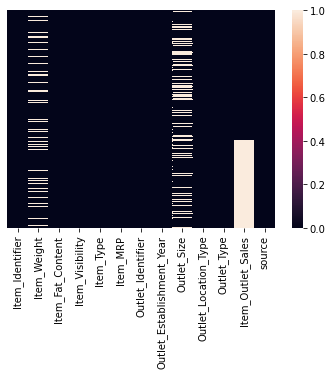

In [1110]:
sns.heatmap(df2.isnull(),yticklabels=False)

lets focus on  item_weight.

In [1111]:
# fill the missing value
item_weight = df2.pivot_table(values ="Item_Weight" ,index = "Item_Identifier")
item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


here we can calculate mean of item_weight based on Item_Identifier. in the table we can see the item_identifier and curresponding average of item_weight

In [1112]:
# lets check in which column we have missing value
miss=df2["Item_Weight"].isnull()
miss

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, Length: 14204, dtype: bool

False represent no missing value True represent yes

In [1113]:
#solve the nan value
for i,item in enumerate (df2["Item_Identifier"]): # altrate based on Item_Identifier
    if miss[i]:
        if item in item_weight:
            df2["Item_Weight"][i] = item_weight.loc[item]["Item_Weight"]# item reprecents the item_identifier
        else:
             df2["Item_Weight"][i] = 0

NOw its fill all the missing value

<AxesSubplot:>

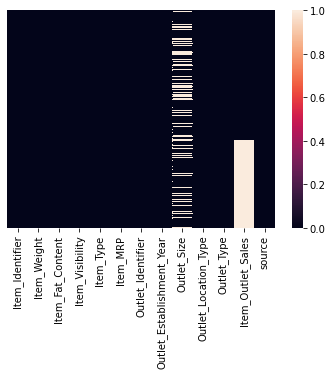

In [1114]:
sns.heatmap(df2.isnull(),yticklabels=False)

lets try to fill nan in column outlet_size based on outlet_type

In [1115]:
outlet_size_mode = df2.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [1116]:
miss_bool = df2['Outlet_Size'].isnull()
df2.loc[miss_bool, 'Outlet_Size'] = df2.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [1117]:
df2['Outlet_Size'].isnull().sum()

0

<AxesSubplot:>

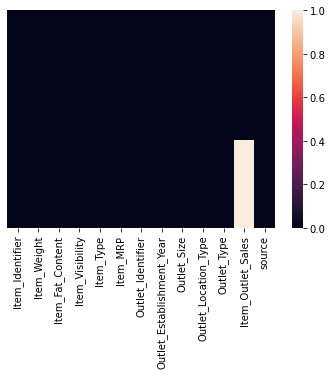

In [1118]:
sns.heatmap(df2.isnull(),yticklabels=False)

In [1119]:
df2["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [1120]:
sum(df2["Item_Visibility"]==0)

879

There are 879 value of zero

In [1121]:
df2.loc[:, 'Item_Visibility'].replace([0], [df2['Item_Visibility'].mean()], inplace=True)

replace Zero with mean

In [1122]:
sum(df2["Item_Visibility"]==0)

0

In [1123]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df2['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Combine the attribute in column Item_Fat_Content

In [1124]:
df2["Outlet_years"]=2013 - df2["Outlet_Establishment_Year"]

In the column of outlet_establishment_year years are big value, it will effect the model so it will change as new attribute. For that this datas are collected 2013 and deduct establishment_year from 2013

In [1125]:
df2["Outlet_years"]

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_years, Length: 14204, dtype: int64

Now the values are small.

In [1126]:
df2['New_Item_Type'] = df2['Item_Identifier'].apply(lambda x: x[:2])
df2['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [1127]:
df2['New_Item_Type'] = df2['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df2['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

For numerical columns:

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

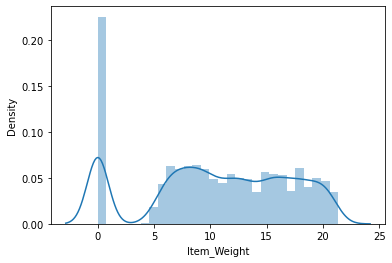

In [1128]:
sns.distplot(df2["Item_Weight"])

The item_weight mean is higher because we have some of missing value fill with mean and zero

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

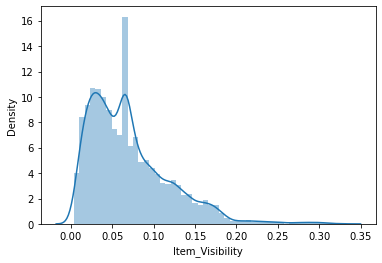

In [1129]:
sns.distplot(df2["Item_Visibility"])

It's left skewed 

In [1130]:
df2["Item_Visibility"].skew()

1.320682723150534

In [1131]:
df2["Item_Visibility"]=np.sqrt(df2["Item_Visibility"])
df2["Item_Visibility"].skew()

0.4175715480875312

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

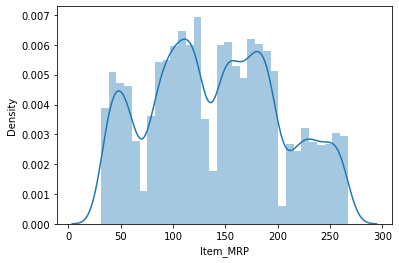

In [1132]:
sns.distplot(df2["Item_MRP"])

it shows 4 bells 

In [1133]:
df2["Item_MRP"].skew()

0.13072836040225863

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

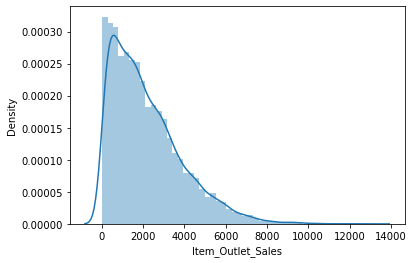

In [1134]:
sns.distplot(df2["Item_Outlet_Sales"])

it is also left skewed . lets correct the skewness for reducing the error

In [1135]:
df2["Item_Outlet_Sales"]=np.log(1+df2["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

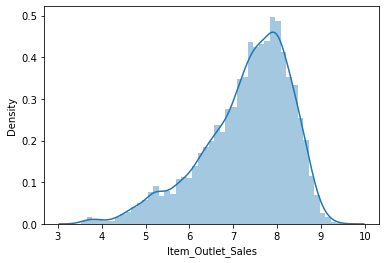

In [1136]:
sns.distplot(df2["Item_Outlet_Sales"])

Now it's almost same as normal curve

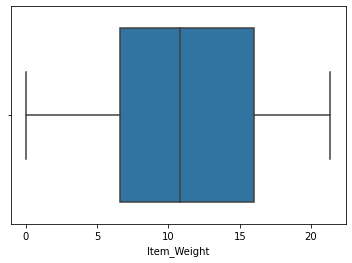

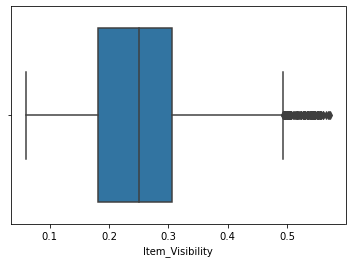

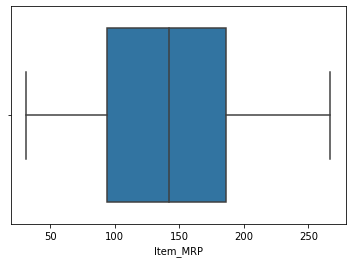

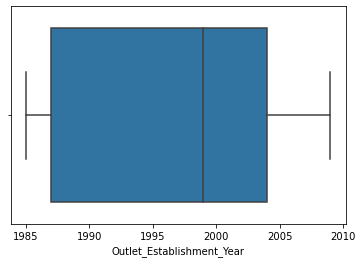

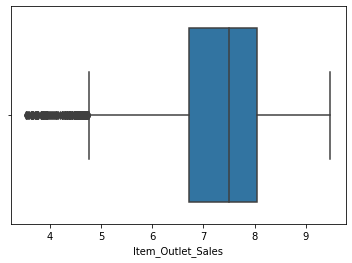

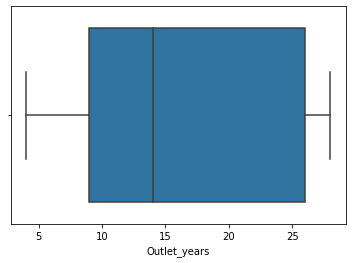

In [1137]:
for i in df2.describe().columns:
    sns.boxplot(df2[i].dropna())
    plt.show()

For categorical columns

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

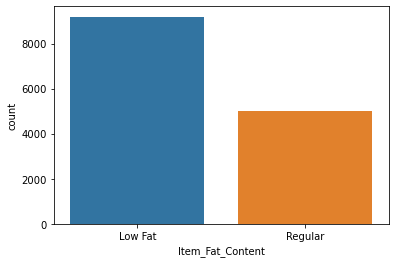

In [1138]:
sns.countplot(df2["Item_Fat_Content"])

Here we can see that most of the product have low fat 

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

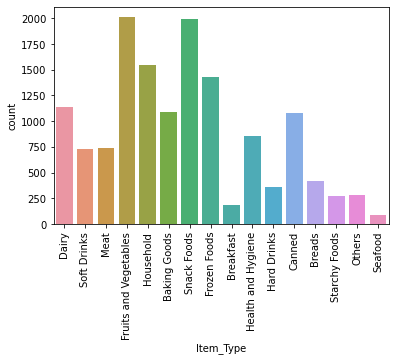

In [1139]:
l = list(df2['Item_Type'].unique())
chart = sns.countplot(df2["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

Fruits and vegetables and snack foods are high distributed product

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

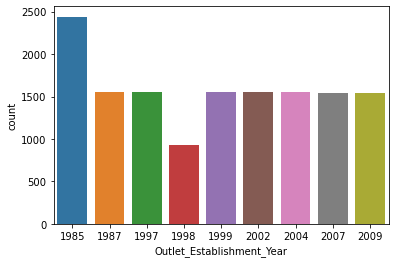

In [1140]:
sns.countplot(df2["Outlet_Establishment_Year"])

More number of store established in 1985

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

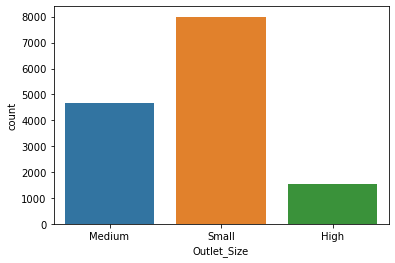

In [1141]:
sns.countplot(df2["Outlet_Size"])

Most of the outlets are small

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

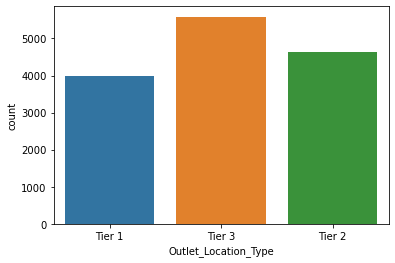

In [1142]:
sns.countplot(df2["Outlet_Location_Type"])

Most of the outlet_location is in Tier 3 class

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

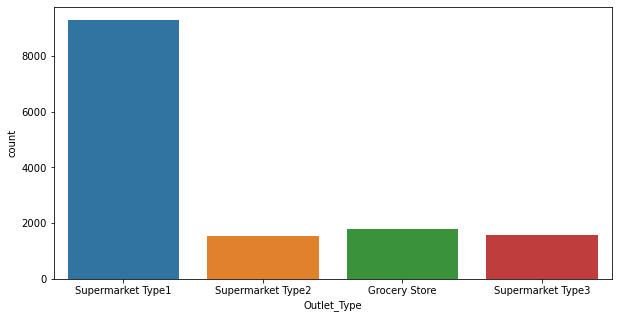

In [1143]:
plt.figure(figsize=(10,5))
sns.countplot(df2["Outlet_Type"])

Most of the supermarket are in supermarket type 1 and other are similer 

<AxesSubplot:>

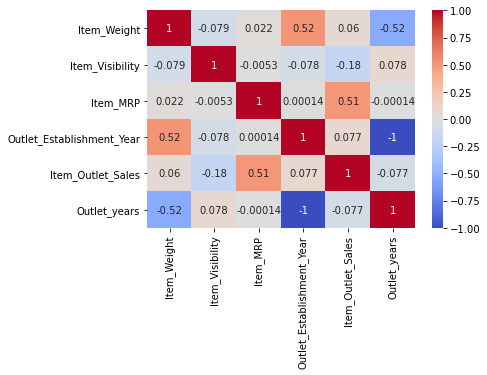

In [1144]:
sns.heatmap(df2.corr(),annot=True ,cmap="coolwarm")

item_outlet_sales and item_MRP are highly correlated

# Convert categorical column in to numerical using Label encoding

In [1145]:
label=LabelEncoder()
df2["Outlet"]=label.fit_transform(df2["Outlet_Identifier"])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df2[col] = label.fit_transform(df2[col])

In [1146]:
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_years,New_Item_Type,Outlet
0,FDA15,9.30,0,0.126678,4,249.8092,OUT049,1999,1,0,1,8.225808,train,14,1,9
1,DRC01,5.92,1,0.138846,14,48.2692,OUT018,2009,1,2,2,6.096776,train,4,0,3
2,FDN15,17.50,0,0.129461,10,141.6180,OUT049,1999,1,0,1,7.648868,train,14,1,9
3,FDX07,19.20,1,0.256813,6,182.0950,OUT010,1998,2,2,0,6.597664,train,15,1,0
4,NCD19,8.93,0,0.256813,9,53.8614,OUT013,1987,0,2,1,6.903451,train,26,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.116174,13,141.3154,OUT046,1997,2,0,1,NaN,test,16,1,8
14200,FDD47,7.60,1,0.378141,15,169.1448,OUT018,2009,1,2,2,NaN,test,4,1,3
14201,NCO17,10.00,0,0.271162,8,118.7440,OUT045,2002,2,1,1,NaN,test,11,2,7
14202,FDJ26,15.30,1,0.256813,3,214.6218,OUT017,2007,2,1,1,NaN,test,6,1,2


In [1147]:
df2=pd.get_dummies(df2,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","New_Item_Type"])

In [1148]:
df2

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_years,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.126678,4,249.8092,OUT049,1999,8.225808,train,14,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.138846,14,48.2692,OUT018,2009,6.096776,train,4,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.129461,10,141.6180,OUT049,1999,7.648868,train,14,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.256813,6,182.0950,OUT010,1998,6.597664,train,15,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.256813,9,53.8614,OUT013,1987,6.903451,train,26,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.116174,13,141.3154,OUT046,1997,NaN,test,16,...,0,0,1,0,1,0,0,0,1,0
14200,FDD47,7.60,0.378141,15,169.1448,OUT018,2009,NaN,test,4,...,0,1,0,0,0,1,0,0,1,0
14201,NCO17,10.00,0.271162,8,118.7440,OUT045,2002,NaN,test,11,...,0,0,1,0,1,0,0,0,0,1
14202,FDJ26,15.30,0.256813,3,214.6218,OUT017,2007,NaN,test,6,...,0,0,1,0,1,0,0,0,1,0


# Split input

In [1149]:
train= df2.loc[df2['source']== 'train']
test = df2.loc[df2['source']== 'test']

In [1150]:
train.drop(['source'],axis=1,inplace=True)
df2.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [1151]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [1152]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train ["Item_Outlet_Sales"]
x_test = test.drop(["Item_Identifier","Outlet_Identifier"],axis=1).copy()

# LinearRegression

In [1153]:
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [1154]:
lr_pred =lr.predict(x_test)

In [1155]:
lr_pred

array([7.26367188, 7.10107422, 6.37402344, ..., 7.27197266, 8.14697266,
       6.95849609])

In [1156]:
lr_accuracy = round(lr.score(x_train,y_train)*100)
lr_accuracy

72

# DecisionTreeRegressor

In [1157]:
tr=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)

tr.fit(x_train,y_train)
tr_pred=tr.predict(x_test)

In [1158]:
tr_accuracy = round(tr.score(x_train,y_train)*100)
tr_accuracy

75

# RandomForestRegressor

In [1159]:
rf = RandomForestRegressor(n_estimators=100,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

rf_accuracy = round(rf.score(x_train,y_train)*100)
rf_accuracy

74

# SVR

In [1160]:
sr=SVR(gamma='auto')
sr.fit(x_train,y_train)
sr_pred = sr.predict(x_test)

sr_accuracy = round(sr.score(x_train,y_train)*100)
sr_accuracy

85

so my best model is SVR